In [1]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


headout_dir = '/home/maojiajing/cernbox/www/LLP/20190214'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')



Welcome to JupyROOT 6.17/01


In [8]:
cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]

    #central fraction of b-quarks, within eta < 1.48
    b_central = float(len(b_eta[np.abs(b_eta) < 1.48]))/float(len(b_eta))
    #central fraction of anti-b-quarks, within eta < 1.48
    bhat_central = float(len(b_eta[np.abs(bhat_eta) < 1.48]))/float(len(bhat_eta))

    print "central (|eta|<1.48) b-quark fraction:", round (b_central*100, 2), "%"
    print "central (|eta|<1.48) anti-b-quark fraction:", round (bhat_central*100, 2), "%" 
    print "barrel-barrel fraction of events = ", round (b_central*bhat_central*100 , 2), " %"
    print "barrel-endcap fraction of events = ", round ((b_central*(1-bhat_central) + (1-b_central)*bhat_central)*100 , 2), " %"
    print "endcap-endcap fraction of events = ", round ((1-b_central)*(1-bhat_central)*100 , 2), " %"
    
    frac_result[k] = Bauble()
 

    frac_result[k].frac_b_cen = b_central
    frac_result[k].frac_bhat_cen = bhat_central
    frac_result[k].frac_BB = b_central*bhat_central
    frac_result[k].frac_BE = b_central*(1-bhat_central) + (1-b_central)*bhat_central
    frac_result[k].frac_EE = (1-b_central)*(1-bhat_central)
    
 
    
    cnt += 1
    

print '\n\n======================= Summary =============================='
#table =  PrettyTable(['Mass_X [GeV]', 'b-quark central fraction', '#bar(b)-quark central fraction', 'Barrel-Barrel fraction [%]', 'Barrel-Endcap fraction [%]', 'Endcap-Endcap fraction [%]'])
table =  PrettyTable(['Mass_X [GeV]', 'b central [%]', '#bar(b) central [%]', 'Barrel-Barrel [%]', 'Barrel-Endcap [%]', 'Endcap-Endcap [%]'])
for m, frac in frac_result.iteritems():
    #if (frac.frac.frac_b_cen>-1):
    print m, frac.frac_b_cen
    row = [str(m), round (frac.frac_b_cen*100, 2), round (frac.frac_bhat_cen*100, 2), round (frac.frac_BB*100, 2), round (frac.frac_BE*100, 2), round (frac.frac_EE*100, 2) ]
        #row += [res.var[1], res.var[0], 'Yes' if res.AmpCorr else 'No']
    table.add_row(row)
        
print table
#table_txt = table.get_string(sort_key=operator.itemgetter(1, 0), sortby="Mass_X [GeV]")
table_txt = table.get_string()
with open(headout_dir+'/SummaryTable.txt','w') as file:
    file.write(table_txt)


m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
central (|eta|<1.48) b-quark fraction: 56.14 %
central (|eta|<1.48) anti-b-quark fraction: 56.08 %
barrel-barrel fraction of events =  31.48  %
barrel-endcap fraction of events =  49.25  %
endcap-endcap fraction of events =  19.26  %
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
central (|eta|<1.48) b-quark fraction: 54.25 %
central (|eta|<1.48) anti-b-quark fraction: 55.22 %
barrel-barrel fraction of events =  29.96  %
barrel-endcap fraction of events =  49.56  %
endcap-endcap fraction of events =  20.49  %
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2
central (|eta|<1.48) b-quark fraction: 56.01 %
central (|eta|<1.48) anti-b-quark fraction: 56.7 %
barrel-barrel fraction of events =  31.76  %
barrel-endcap fraction of events =  49.19  %
endcap-endcap fraction of events =  19.05  %


===

m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_eta.png has been created


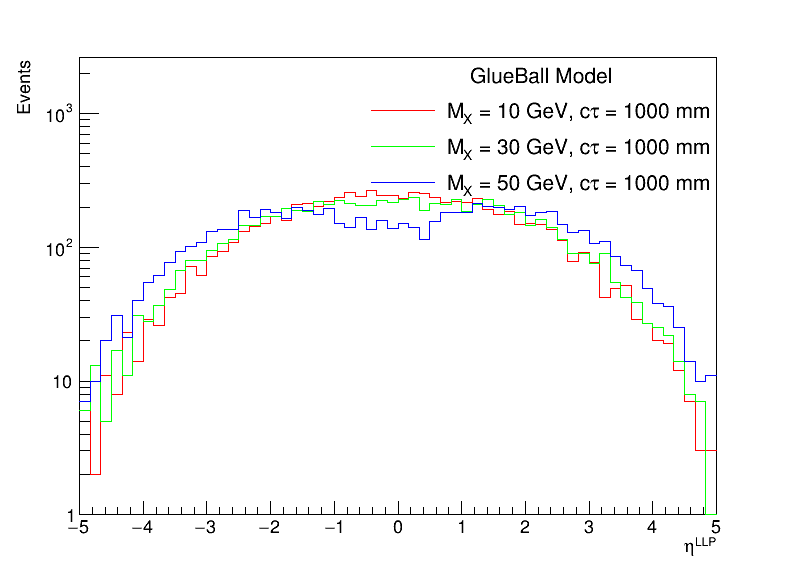

In [13]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','c', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
        
    h['llp_eta'+str(k)] = create_TH1D(llp_eta, axis_title=['#eta^{LLP}', 'Events'], name='', binning=[60,-5,5])
    h['llp_eta'+str(k)].SetLineColor(cnt+2)
    h['llp_eta'+str(k)].SetStats(0)
    h['llp_eta'+str(k)].SetMaximum(10*h['llp_eta'+str(k)].GetMaximum())
    h['llp_eta'+str(k)].Draw('same')

    legall.AddEntry(h['llp_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_eta.png')
 


m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_pt.png has been created


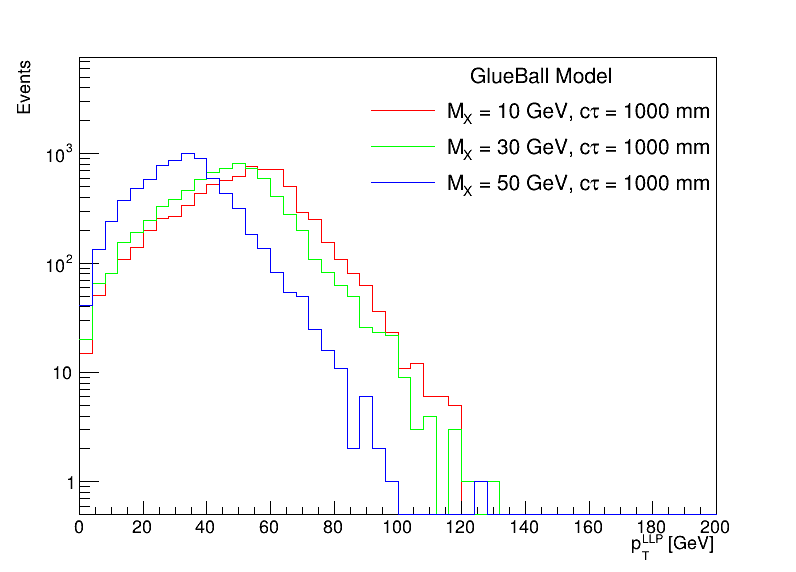

In [10]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}

 
#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pt'+str(k)] = create_TH1D(llp_pt, axis_title=['p_{T}^{LLP} [GeV]', 'Events'], name='', binning=[50,0,200])
    h['llp_pt'+str(k)].SetLineColor(cnt+2)
    h['llp_pt'+str(k)].SetStats(0)
    h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['llp_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pt.png')



 
 


m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_phi.png has been created


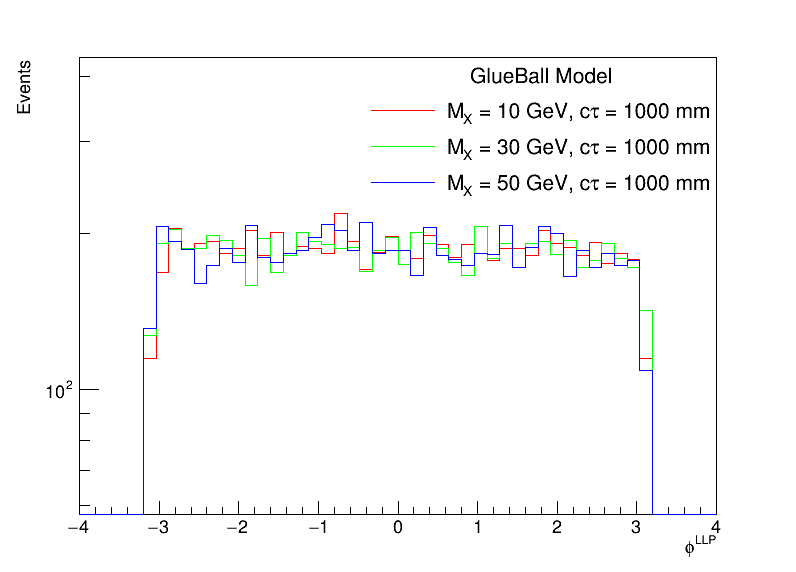

In [11]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_phi'+str(k)] = create_TH1D(llp_phi, axis_title=['#phi^{LLP}', 'Events'], name='', binning=[50,-4,4])
    h['llp_phi'+str(k)].SetLineColor(cnt+2)
    h['llp_phi'+str(k)].SetStats(0)
    h['llp_phi'+str(k)].SetMaximum(2*h['llp_phi'+str(k)].GetMaximum())
    h['llp_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_phi.png')



 

m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_e.png has been created


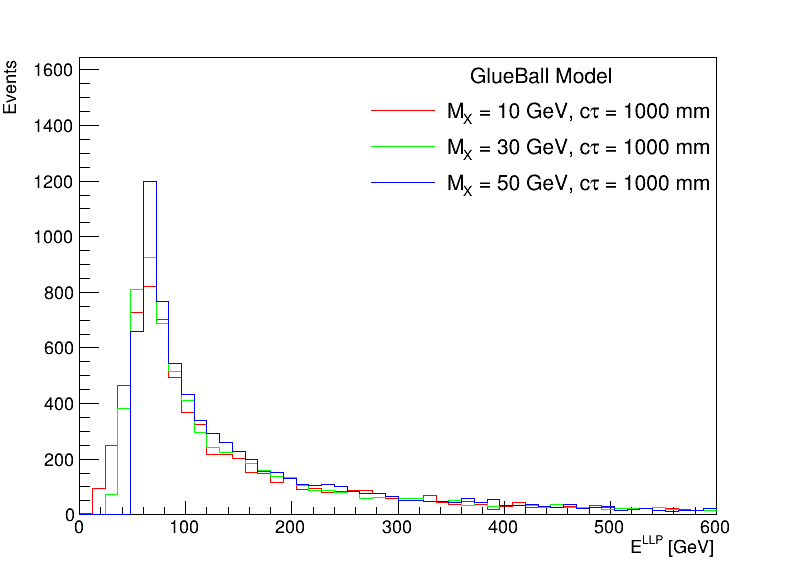

In [5]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_e'+str(k)] = create_TH1D(llp_e, axis_title=['E^{LLP} [GeV]', 'Events'], name='', binning=[50,0,600])
    h['llp_e'+str(k)].SetLineColor(cnt+2)
    h['llp_e'+str(k)].SetStats(0)
    #h['llp_e'+str(k)].SetMaximum(10*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].SetMaximum(2*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_e.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/b_e.png has been created


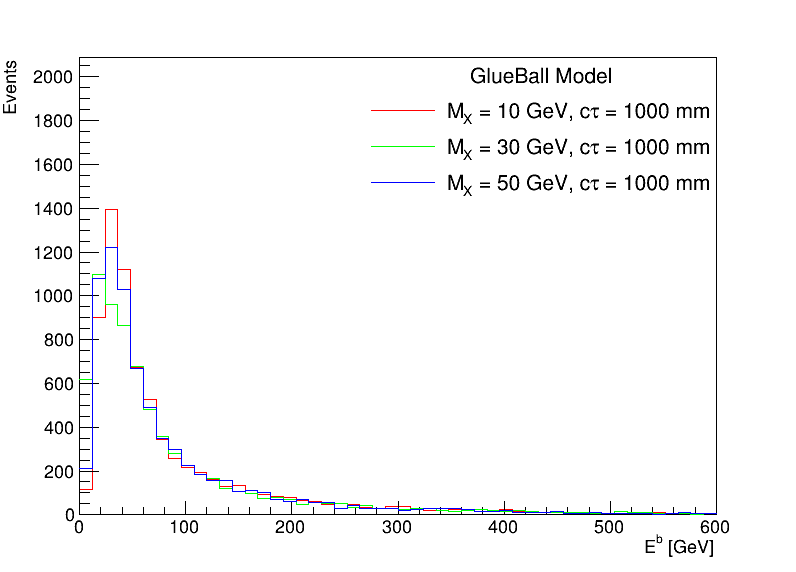

In [8]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_e'+str(k)] = create_TH1D(b_e, axis_title=['E^{b} [GeV]', 'Events'], name='', binning=[50,0,600])
    h['b_e'+str(k)].SetLineColor(cnt+2)
    h['b_e'+str(k)].SetStats(0)
    #h['b_e'+str(k)].SetMaximum(10*h['b_e'+str(k)].GetMaximum())
    h['b_e'+str(k)].SetMaximum(1.5*h['b_e'+str(k)].GetMaximum())
    h['b_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_e.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/bbar_e.png has been created


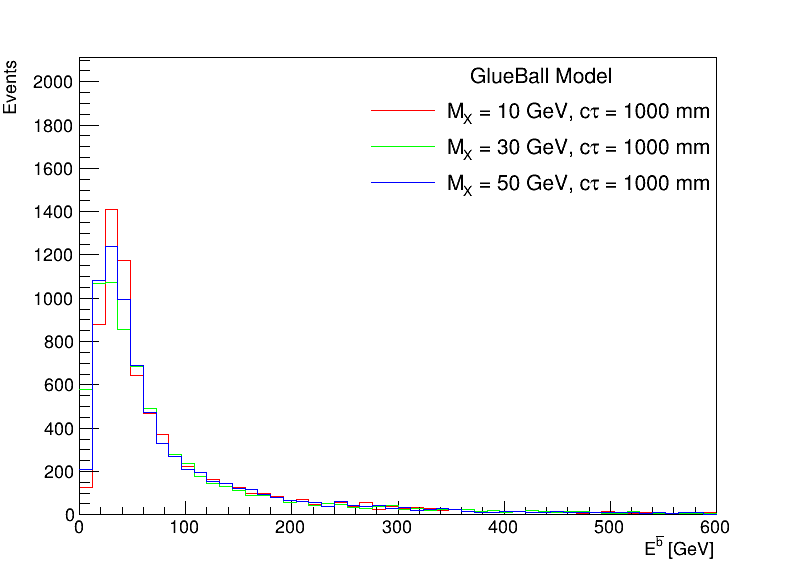

In [9]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_e'+str(k)] = create_TH1D(bhat_e, axis_title=['E^{#bar{b}} [GeV]', 'Events'], name='', binning=[50,0,600])
    h['bhat_e'+str(k)].SetLineColor(cnt+2)
    h['bhat_e'+str(k)].SetStats(0)
    #h['bhat_e'+str(k)].SetMaximum(10*h['bhat_e'+str(k)].GetMaximum())
    h['bhat_e'+str(k)].SetMaximum(1.5*h['bhat_e'+str(k)].GetMaximum())
    h['bhat_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_e.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/b_pt.png has been created


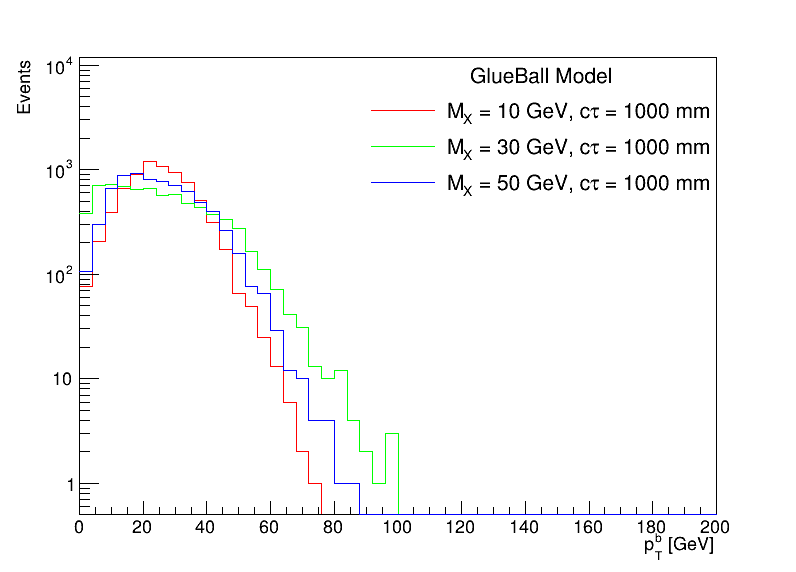

In [18]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_pt'+str(k)] = create_TH1D(b_pt, axis_title=['p_{T}^{b} [GeV]', 'Events'], name='', binning=[50,0,200])
    h['b_pt'+str(k)].SetLineColor(cnt+2)
    h['b_pt'+str(k)].SetStats(0)
    h['b_pt'+str(k)].SetMaximum(10*h['b_pt'+str(k)].GetMaximum())
    h['b_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_pt.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/bbar_pt.png has been created


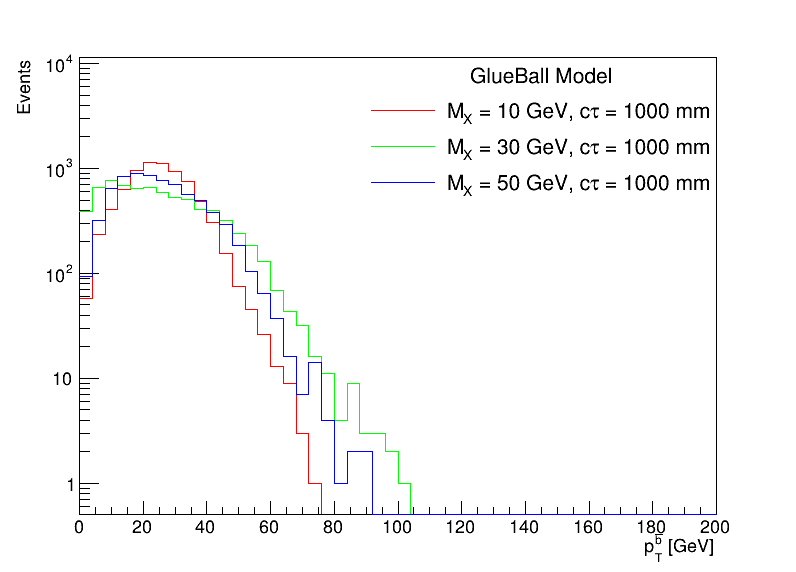

In [20]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_pt'+str(k)] = create_TH1D(bhat_pt, axis_title=['p_{T}^{#bar{b}} [GeV]', 'Events'], name='', binning=[50,0,200])
    h['bhat_pt'+str(k)].SetLineColor(cnt+2)
    h['bhat_pt'+str(k)].SetStats(0)
    h['bhat_pt'+str(k)].SetMaximum(10*h['bhat_pt'+str(k)].GetMaximum())
    h['bhat_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_pt.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/b_phi.png has been created


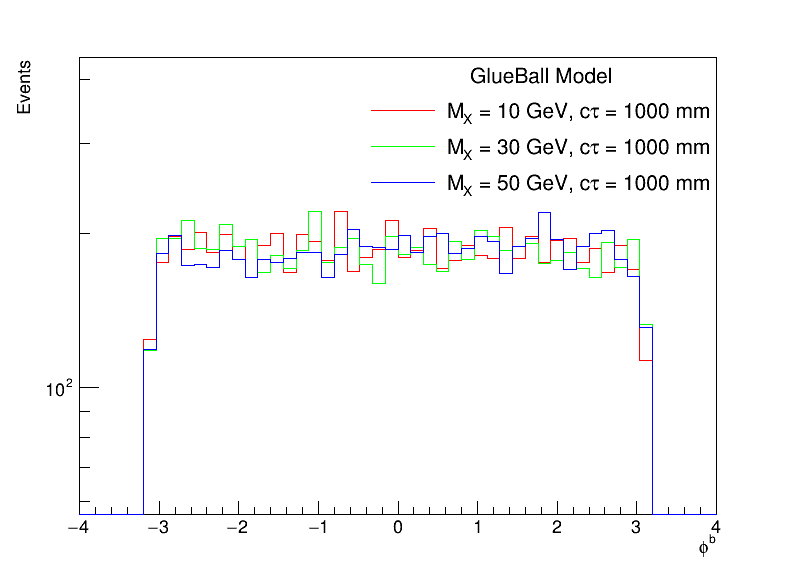

In [22]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_phi'+str(k)] = create_TH1D(b_phi, axis_title=['#phi^{b}', 'Events'], name='', binning=[50,-4,4])
    h['b_phi'+str(k)].SetLineColor(cnt+2)
    h['b_phi'+str(k)].SetStats(0)
    h['b_phi'+str(k)].SetMaximum(2*h['b_phi'+str(k)].GetMaximum())
    h['b_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_phi.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/bbar_phi.png has been created


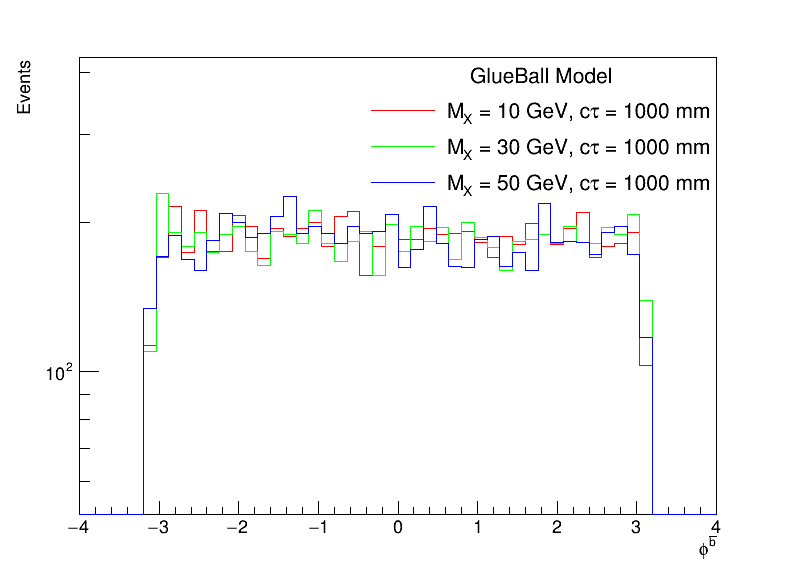

In [25]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_phi'+str(k)] = create_TH1D(bhat_phi, axis_title=['#phi^{#bar{b}}', 'Events'], name='', binning=[50,-4,4])
    h['bhat_phi'+str(k)].SetLineColor(cnt+2)
    h['bhat_phi'+str(k)].SetStats(0)
    h['bhat_phi'+str(k)].SetMaximum(2*h['bhat_phi'+str(k)].GetMaximum())
    h['bhat_phi'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_phi'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_phi.png')



m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/b_eta.png has been created


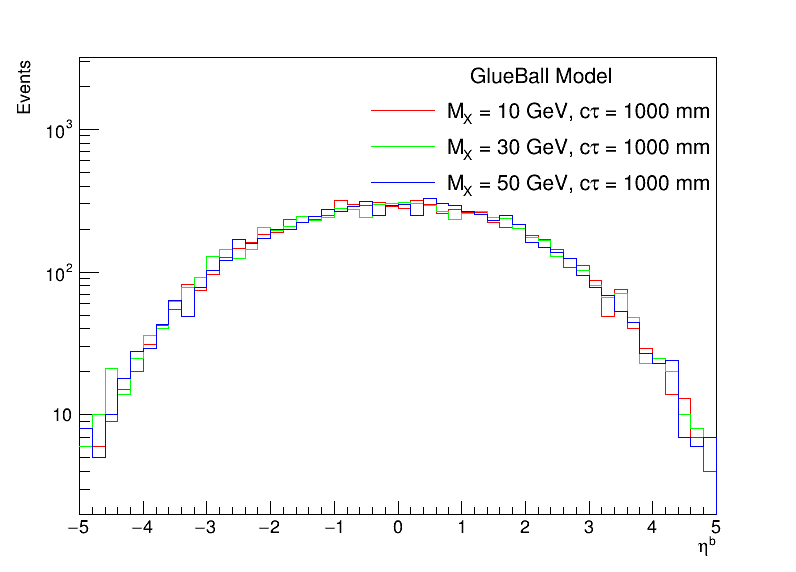

In [24]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['b_eta'+str(k)] = create_TH1D(b_eta, axis_title=['#eta^{b}', 'Events'], name='', binning=[50,-5,5])
    h['b_eta'+str(k)].SetLineColor(cnt+2)
    h['b_eta'+str(k)].SetStats(0)
    h['b_eta'+str(k)].SetMaximum(10*h['b_eta'+str(k)].GetMaximum())
    h['b_eta'+str(k)].Draw('same')

  
    legall.AddEntry(h['b_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/b_eta.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/bbar_eta.png has been created


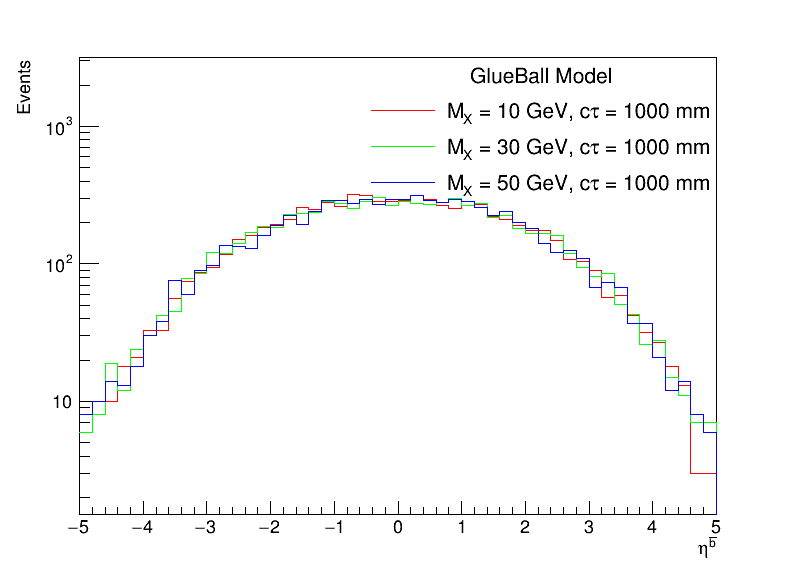

In [26]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]



    h['bhat_eta'+str(k)] = create_TH1D(bhat_eta, axis_title=['#eta^{#bar{b}}', 'Events'], name='', binning=[50,-5,5])
    h['bhat_eta'+str(k)].SetLineColor(cnt+2)
    h['bhat_eta'+str(k)].SetStats(0)
    h['bhat_eta'+str(k)].SetMaximum(10*h['bhat_eta'+str(k)].GetMaximum())
    h['bhat_eta'+str(k)].Draw('same')

  
    legall.AddEntry(h['bhat_eta'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/bbar_eta.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_e.png has been created


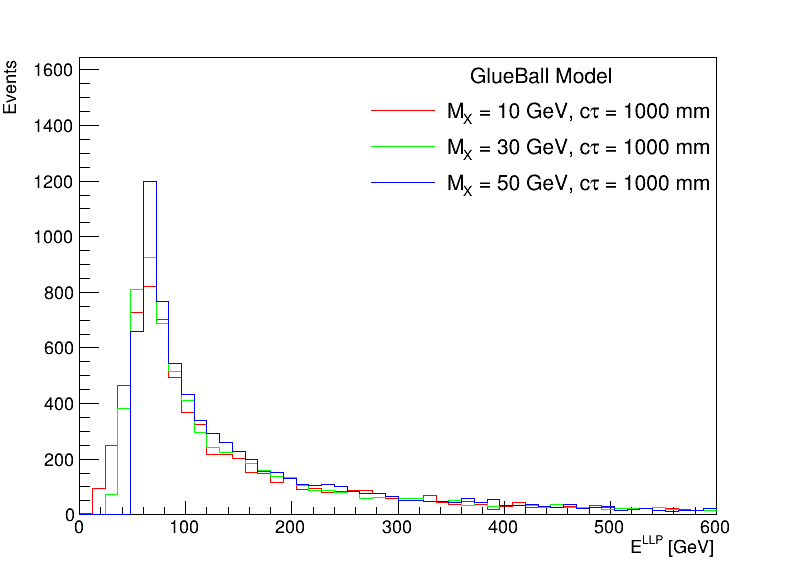

In [11]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    bb_ht = b_pt + bhat_pt

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_e'+str(k)] = create_TH1D(llp_e, axis_title=['E^{LLP} [GeV]', 'Events'], name='', binning=[50,0,600])
    h['llp_e'+str(k)].SetLineColor(cnt+2)
    h['llp_e'+str(k)].SetStats(0)
    #h['llp_e'+str(k)].SetMaximum(10*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].SetMaximum(2*h['llp_e'+str(k)].GetMaximum())
    h['llp_e'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_e'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_e.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_m.png has been created


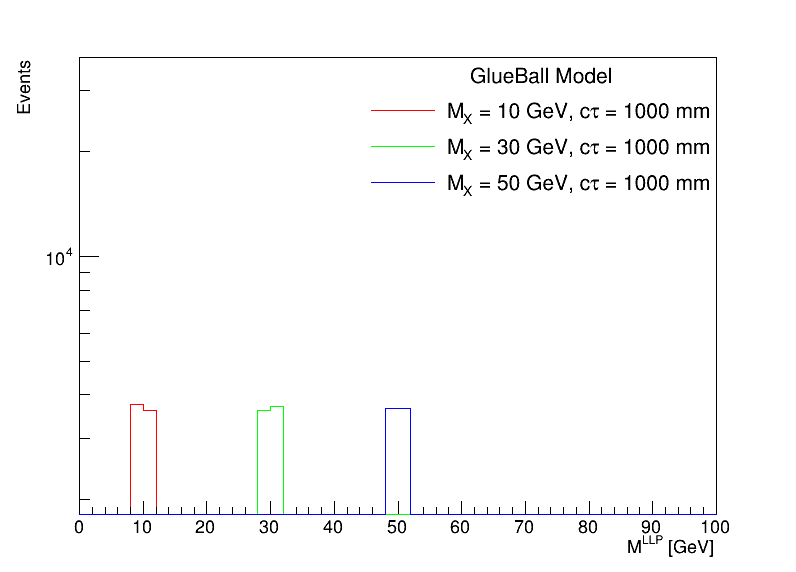

In [3]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_m = [x.M() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_m'+str(k)] = create_TH1D(llp_m, axis_title=['M^{LLP} [GeV]', 'Events'], name='', binning=[50,0,100])
    h['llp_m'+str(k)].SetLineColor(cnt+2)
    h['llp_m'+str(k)].SetStats(0)
    h['llp_m'+str(k)].SetMaximum(10*h['llp_m'+str(k)].GetMaximum())
    h['llp_m'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_m'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_m.png')



m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_pz.png has been created


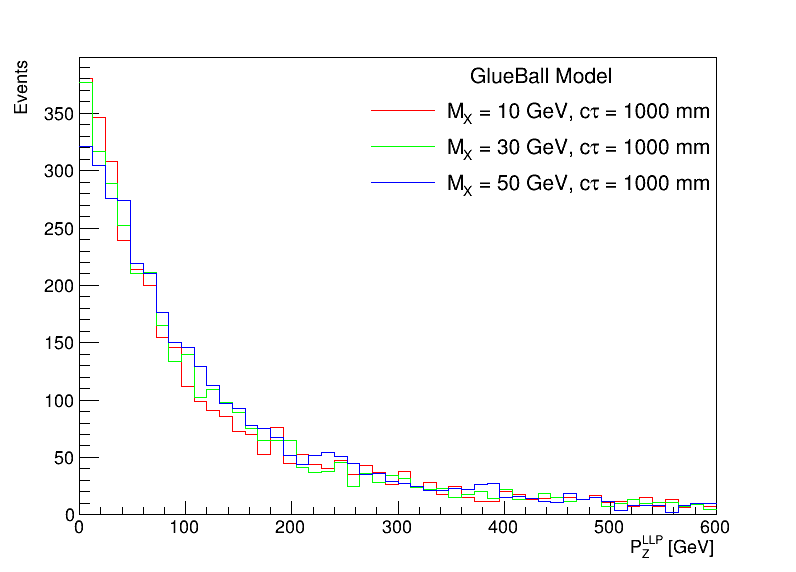

In [14]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_pz   = [x.Pz() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_pz'+str(k)] = create_TH1D(llp_pz, axis_title=['P_{Z}^{LLP} [GeV]', 'Events'], name='', binning=[50,0,600])
    h['llp_pz'+str(k)].SetLineColor(cnt+2)
    h['llp_pz'+str(k)].SetStats(0)
    #h['llp_pz'+str(k)].SetMaximum(10*h['llp_pz'+str(k)].GetMaximum())
    h['llp_pz'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_pz'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
#c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_pz.png')




m10ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root 0
m30ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root 1
m50ct1000mm /home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190214/LLP_et.png has been created


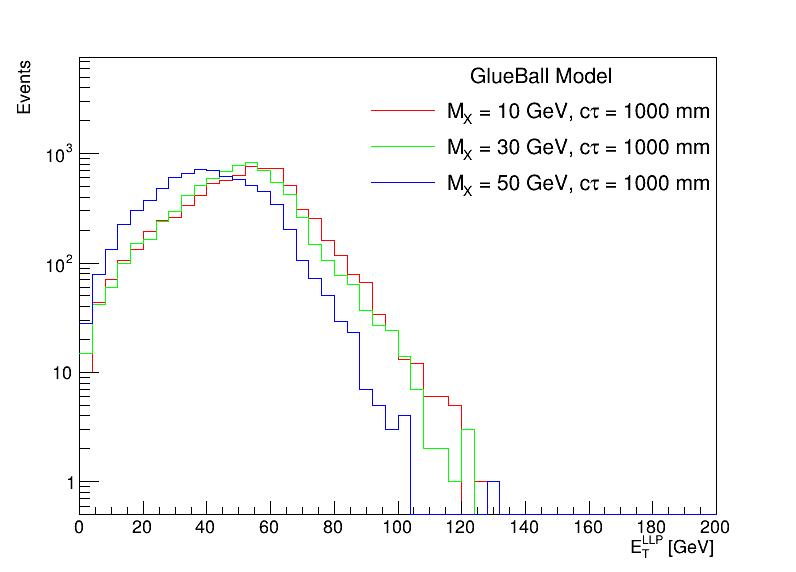

In [9]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable

fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


#fpath['glueBall'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'
fpath['m10ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m10_pl1000.root'
fpath['m30ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m30_pl1000.root'
fpath['m50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/glueball/jetNtuple_glueball_m50_pl1000.root'

label['m10ct1000mm'] = 'M_{X} = 10 GeV, c#tau = 1000 mm'
label['m30ct1000mm'] = 'M_{X} = 30 GeV, c#tau = 1000 mm'
label['m50ct1000mm'] = 'M_{X} = 50 GeV, c#tau = 1000 mm'


#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=10

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['gParticlePt'][:,4]

    #gen particle id for bottom quark and anti-bottom quark
    sel_b = ten_gen_var['gParticleId'] == 5
    sel_bhat = ten_gen_var['gParticleId'] == -5

    #4-variables for bottom quark
    b_pt  = ten_gen_var['gParticlePt'][sel_b]
    b_eta = ten_gen_var['gParticleEta'][sel_b]
    b_phi = ten_gen_var['gParticlePhi'][sel_b]
    b_e = ten_gen_var['gParticleE'][sel_b]


    #4-variables for anti-bottom quark
    bhat_pt  = ten_gen_var['gParticlePt'][sel_bhat]
    bhat_eta = ten_gen_var['gParticleEta'][sel_bhat]
    bhat_phi = ten_gen_var['gParticlePhi'][sel_bhat]
    bhat_e = ten_gen_var['gParticleE'][sel_bhat]


    #GOTTA get some TLorentz Vectors for the LLPs
    llp_p4 = []
    b_p4 = []
    bhat_p4 = []
    
    
    for i in range(len(b_pt)):
        tmp_p4_b    = rt.TLorentzVector()
        tmp_p4_bhat = rt.TLorentzVector()
        tmp_p4_b.SetPtEtaPhiE(b_pt[i],b_eta[i],b_phi[i], b_e[i])
        tmp_p4_bhat.SetPtEtaPhiE(bhat_pt[i],bhat_eta[i],bhat_phi[i], bhat_e[i])
        b_p4.append(tmp_p4_b)
        bhat_p4.append(tmp_p4_bhat)
        llp_p4.append(tmp_p4_b+tmp_p4_bhat)

    llp_pt  = [x.Pt() for x in llp_p4]
    llp_eta = [x.Eta() for x in llp_p4]
    llp_phi = [x.Phi() for x in llp_p4]
    llp_e   = [x.E() for x in llp_p4]
    
    llp_pz   = [x.Pz() for x in llp_p4]
    llp_et   = [x.Et() for x in llp_p4]

    #for i in llp_p4:
    #    print i.M()

    #for pid,pt,eta,phi,e in zip(ten_gen_var['gParticleId'],ten_gen_var['gParticlePt'],ten_gen_var['gParticleEta'],ten_gen_var['gParticlePhi'],ten_gen_var['gParticleE']):
        #print pid, pt, eta
        #print [y if x == 5 else -1 for x,y in zip(pid,pt)]
    h['llp_et'+str(k)] = create_TH1D(llp_et, axis_title=['E_{T}^{LLP} [GeV]', 'Events'], name='', binning=[50,0,200])
    h['llp_et'+str(k)].SetLineColor(cnt+2)
    h['llp_et'+str(k)].SetStats(0)
    h['llp_et'+str(k)].SetMaximum(10*h['llp_et'+str(k)].GetMaximum())
    h['llp_et'+str(k)].Draw('same')

  
    legall.AddEntry(h['llp_et'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/LLP_et.png')


